<h1>Using Databases with Python</h1>

<h1>Module 1: Object Oriented Python</h1>

<h2>14.1 Object oriented definitions and Terminoligies</h2>

* A program is made up of many "objects"
* Instead of being a the "whole program", each object is a little 'island' within the program and cooperatively working with other objects.
* A program is made up of one or more objects working together, objects make use of other's capabilites

<h3>Object</h3>

* An object is a bit of self-contained code and data
* A key aspect of the object approach is to break the problem into smaller understandable parts
* Objects have boundaries that allow us to ignore un- needed detail

<h3>Instance</h3>

* One can have an instance of a class or a particular object. The instance is the actual object created at runtime. The set of values of the attributes of a particular object is called its state. The object consists of state and the behavior that's defined in the object's class
* Object and Instance are often used interchangeably.

<h3>Method</h3>

* An object's abilites. Methods and message are often used interchangeably.
    * Look at the example below to understand better



<h2>14.2 Our first class and object</h2>

In [1]:
class partyAnimal:#class - template
    def __init__(self):#self is an instance
        self.x = 0
    def party(self):#party() is a method
        self.x = self.x + 1
        print("so far", self.x)

an = partyAnimal()

an.party()
an.party()
an.party()

so far 1
so far 2
so far 3


<h3>dir() and type()</h3>

* dir() - lists capabilites
* type() - tells us something about a variable

In [2]:
print("type", type(an))
print("dir", dir(an))
print("type", type(an.x))
print("type", type(an.party))

type <class '__main__.partyAnimal'>
dir ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'party', 'x']
type <class 'int'>
type <class 'method'>


<h2>14.3 Object life cycle</h2>

* Objects are created, used and disarded
    * constructor -> execution -> destructor
* Constructors are used a lot, destructors are seldom used.

In [3]:
class partyAnimal:
    def __init__(self):             #constructor
        self.x = 0
        print('I am constructed')
    def party(self):                #execution
        self.x = self.x + 1
        print("so far", self.x)
    def __del__(self):              #destructor
        print('I am destructed', self.x)

an = partyAnimal()
an.party()
an.party()
an = 42                             #an is destructed, so now it gets initialized as an integer
print('an contains', an)

I am constructed
so far 1
so far 2
I am destructed 2
an contains 42


<h3>Example on multiple instances</h3>

In [4]:
class partyAnimal:
    def __init__(self, z):
        self.x = 0
        self.name = z
        print(self.name, 'constructed')
    def party(self):
        self.x = self.x + 1
        print(self.name, "party count", self.x)

s = partyAnimal('Sally')
s.party()
j = partyAnimal('Jim')

j.party()
s.party()

Sally constructed
Sally party count 1
Jim constructed
Jim party count 1
Sally party count 2


<h2>14.4 Object inheritance</h2>

* When we make a new class, we can reuse an existing class and <b>inherit</b> all the capabilites of an existing class and then add our own little bit to make our new class
* The new class (child) has all the capabilities of the old class (parent) and then some more

* 'Subclasses' are more specialized versions of a class, which inherit attributes and behaviours from their parent classes, and can introduce their own

In [5]:
class partyAnimal:
    def __init__(self, nam):
        self.x = 0
        self.name = nam
        print(self.name, 'constructed')
    def party(self):
        self.x = self.x + 1
        print(self.name, "party count", self.x)

class footballFan(partyAnimal):
    def __init__(self, nam):
        super().__init__(nam)
        self.points = 0
# footballFan() is a class which extends partyAnimal(). 
# It has all the capabilities of partyAnimal() and more.

    def touchdown(self):
        self.points = self.points + 7
        self.party()
        print(self.name, 'points', self.points)
    
s = partyAnimal('Sally')
s.party()

j = footballFan('Jim')
j.party()
j.touchdown()

Sally constructed
Sally party count 1
Jim constructed
Jim party count 1
Jim party count 2
Jim points 7


<h3>Definitions</h3>

* Class - a template
* Method or Message - A defined capabilit of a class
* Field or attribute - A bit of data in a class
* Object or Instance - A particular instance of a class
* Constructor - code that runs when an object is created
* Inheritance - The ability to extend a class to make a new class

<h1>Module 2: Basic Structured Query Language</h1>

<h2>15.1 Relational Databases</h2> 

* Relational databases model data by storing rows and columns in tables. The power of the relational database lies in its ability to efficiently retrieve data from thos tables and in particular where there are multiple tables and the relationships between those tables involved in the query.

<h3>Terminology</h3>

* Database - contains many tables
* Relation (or table) - contains tuples and attributes
* Tuple (or row) - a set of fields that generally represents an 'object' like a person or a music track
* Attribute (also column or field) - one of possibly many elements of data corresponding to the object represented by the row


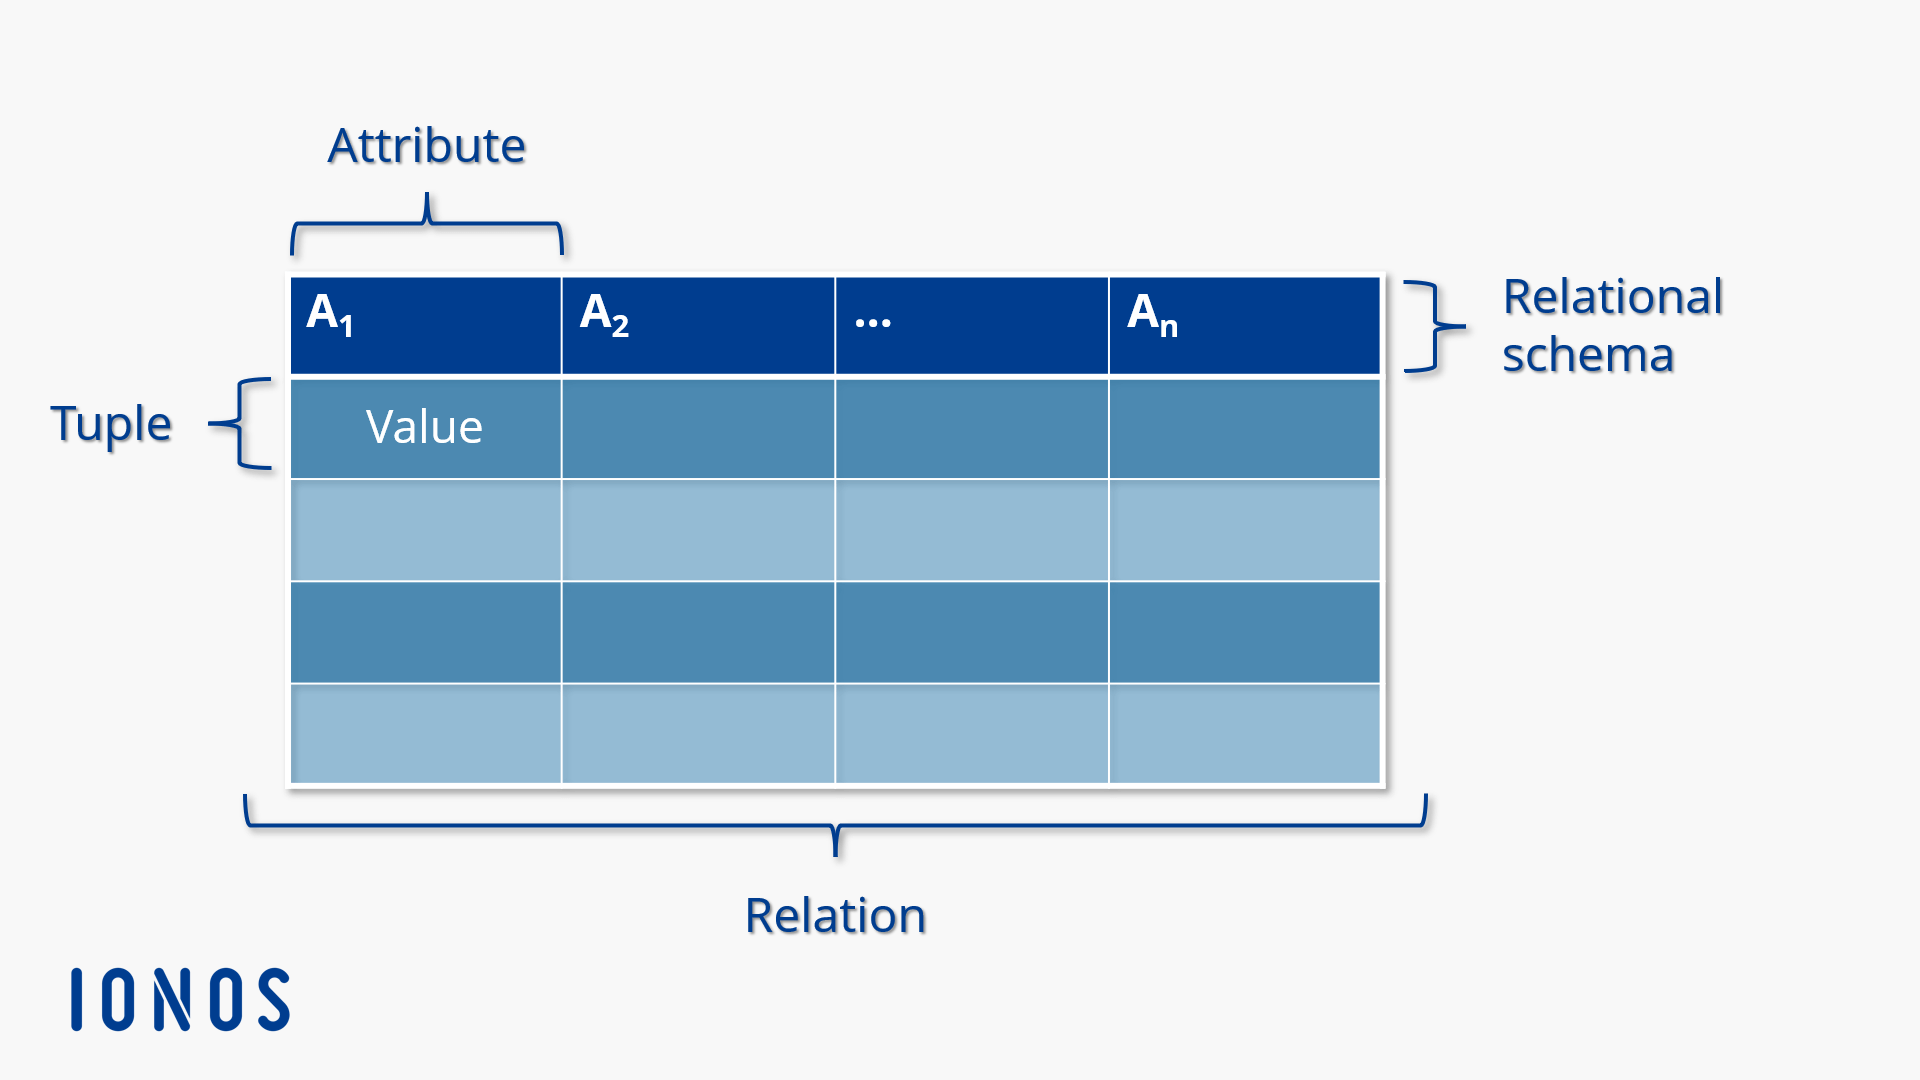

<h2>SQL</h2>

* <b>Structured Query Language</b> is the language we se to issue commands tothe database
    * Create a table, retrieve data, update data, insert data, delete data.

<h2>15.2 - Using Databases</h2>

<h3>Two roles in large projects</h3>

* <b>Application Developer</b> 
    * builds the logic for the application, the look and feel of the application, monitors the application for problems
* <b>Database Administrator</b>
    * a person responsible for the design, implementation, and repair of an organization's database. 
    * This role includes the development and design of databases strategies, monitoring and improbing database performance and capacity, and planning for future expansion requirements. They may also plan, coordinate, and implement security measures to safegaurd the database.
* Often both people participate in the building of the "Data model"

![Large project structure.png](<attachment:Large project structure.png>)
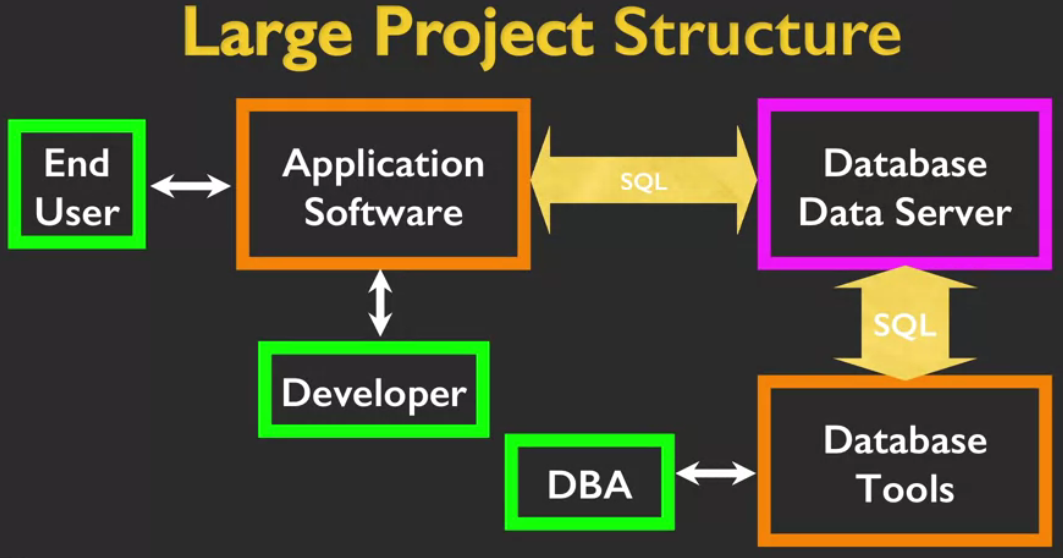

![data analysis structure.png](<attachment:data analysis structure.png>)
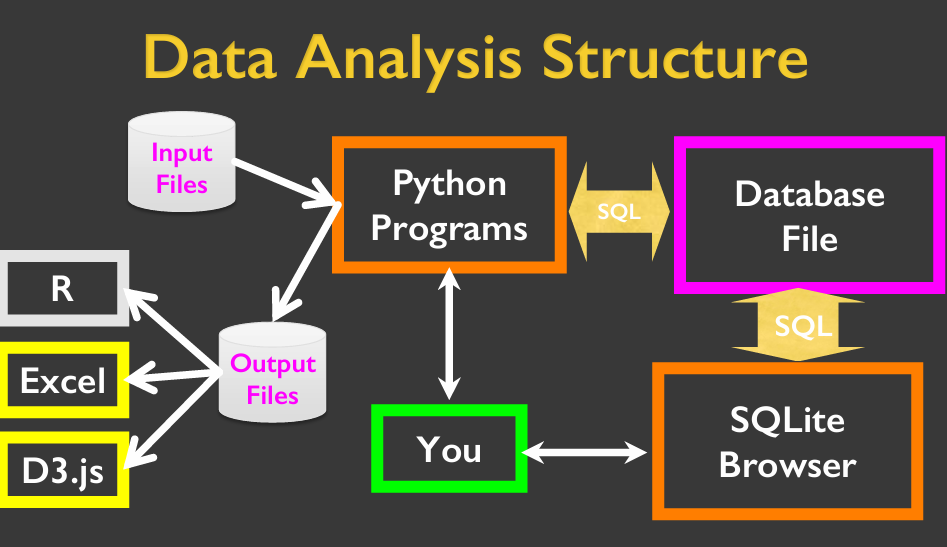

* Three major database management systems in wide use
    * Oracle - Large, commercial, enterprise-scale, very very tweakable
    * MySql - Simpler but very fast and scalable - commercial open source
    * SqlServer - Very nice, from Microsoft (also access)
* Many other smaller projects, free and open source
    * HSQL, SQLite, Postgress,...

<h2>15.3 - SQL basics</h2>

<h3>Creating a table in SQL</h3>
<code style="color:lightgreen">
CREATE TABLE Users{<br>
    name VARCHAR(128);<br>
    email VARCHAR(128);<br>
}
</code>

Creates a table with column names as 'name' and 'email' with 128 bits of space for each value

<h3>SQL: INSERT</h3>
<code style="color:lightgreen">
INSERT INTO Users(name, email) VALUES ('Fred', 'fred@gmail.com')
</code>

Inserts a new row with data, 'Fred' and 'fred@gmail.com' 

<h3>SQL: DELETE</h3>
<code style="color:lightgreen">
DELETE FROM Users WHERE email='fred@gmail.com'
</code>

Looks for a row with email 'fred@gmail.com' and deletes it

<h3>SQL: UPDATE</h3>
<code style="color:lightgreen">
UPDATE Users SET name='KarenUpdated' WHERE email='karen@gmail.com'
</code>

Looks for a row with email 'karen@gmail.com' and sets its name to 'KarenUpdated'

<h3>Retrieving records: SELECT</h3>
<code style="color:lightgreen">
SELECT * FROM Users
</code>

Selects all rows in the table 'Users' and displays it in the output window

<code style="color:lightgreen">
SELECT*FROM Users WHERE email='fred@gmail.com'
</code>

Selects the rows in 'Users' with email 'fred@gmail.com' and displays it in the output window

<h3>Sorting with ORDER BY</h3>
<code style="color:lightgreen">
SELECT * FROM Users ORDER BY email
</code>

Selects all rows in the table 'Users', sorts the emails in alphabetical order and displays it in the output window

<h3>Assignment</h3>

This application will read the mailbox data (mbox.txt) and count the number of email messages per organization (i.e. domain name of the email address)

In [ ]:
import sqlite3

conn = sqlite3.connect('emaildb.sqlite')
cur = conn.cursor()

cur.execute('DROP TABLE IF EXISTS Counts')

cur.execute('''
CREATE TABLE Counts (org TEXT, count INTEGER)''')

fname = input('Enter file name: ')
if (len(fname) < 1): fname = 'mbox-short.txt'
fh = open(fname)
for line in fh:
    if not line.startswith('From: '): continue
    pieces = line.split()
    email = pieces[1].split('@')[1]
    cur.execute('SELECT count FROM Counts WHERE org = ? ', (email,))
    row = cur.fetchone()
    if row is None:
        cur.execute('''INSERT INTO Counts (org, count)
                VALUES (?, 1)''', (email,))
    else:
        cur.execute('UPDATE Counts SET count = count + 1 WHERE org = ?',
                    (email,))
conn.commit()

# https://www.sqlite.org/lang_select.html
sqlstr = 'SELECT org, count FROM Counts ORDER BY count DESC LIMIT 5'

for row in cur.execute(sqlstr):
    print(str(row[0]), row[1])

cur.close()

<h2>15.4 - Designing a Data Model</h2>